In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import glob



In [28]:
df=pd.read_csv('Results_v1.csv')

In [29]:
df['Date GPS']=pd.to_datetime(df['Date GPS'],dayfirst=True)

In [30]:
#весь второй полет
df_new = df.set_index('Date GPS').between_time('13:25:00', '16:20:00')
#полет до момента отключения
#df_new = df.set_index('Date GPS').between_time('13:25:00', '14:12:35')

In [31]:
df_new

,"Datetime, dd/mm/yyyy hh:mm:ss","GPS Time, hhmmssddmmyy",Status,Antenna,Longitude,Latitude,"Altitude, m","Speed, km/h",Course,"HDC TEMP, `C",...,"LSM AX, mg","LSM AY, mg","LSM AZ, mg",LSM GX,LSM GY,LSM GZ,PM2.5,PM10,"BATT, V","VSYS, V"
Date GPS,,,,,,,,,,,,,,,,,,,,,
2022-05-08 13:25:00+05:00,'05/08/2022 14:24:55,'082500080522,FIX,OK,65.004814,40.13285,323.2,2.0,54.5,38.3,...,134.1,-35.7,990.9,210.0,560.0,37870.0,9.4,52.9,4.18,0.04
2022-05-08 13:25:01+05:00,'05/08/2022 14:24:56,'082501080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,136.3,-32.5,1012.7,36610.0,-5670.0,37100.0,9.3,52.9,4.18,0.05
2022-05-08 13:25:02+05:00,'05/08/2022 14:24:56,'082502080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,136.3,-32.5,1012.7,36610.0,-5670.0,37100.0,9.3,52.9,4.18,0.05
2022-05-08 13:25:03+05:00,'05/08/2022 14:24:57,'082503080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,122.2,-45.5,1015.5,-3430.0,28070.0,-37380.0,9.3,53.9,4.18,0.05
2022-05-08 13:25:04+05:00,'05/08/2022 14:24:58,'082504080522,FIX,OK,65.004822,40.13285,323.2,0.0,54.5,38.3,...,131.0,-38.5,1023.2,-24710.0,-9380.0,-9310.0,9.2,58.1,4.18,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08 16:19:56+05:00,'05/08/2022 17:19:54,'111956080522,FIX,OK,65.729088,40.68353,445.2,0.0,154.4,38.3,...,-144.5,-997.0,-69.2,0.0,0.0,0.0,6.5,15.5,4.09,0.04
2022-05-08 16:19:57+05:00,'05/08/2022 17:19:55,'111957080522,FIX,OK,65.729088,40.68353,445.2,0.0,154.4,38.3,...,-144.5,-997.0,-69.7,0.0,0.0,0.0,6.5,15.5,4.09,0.04
2022-05-08 16:19:58+05:00,'05/08/2022 17:19:56,'111958080522,FIX,OK,65.729088,40.68353,445.3,0.0,154.4,38.3,...,-144.5,-997.2,-70.1,0.0,0.0,0.0,6.6,15.5,4.09,0.04


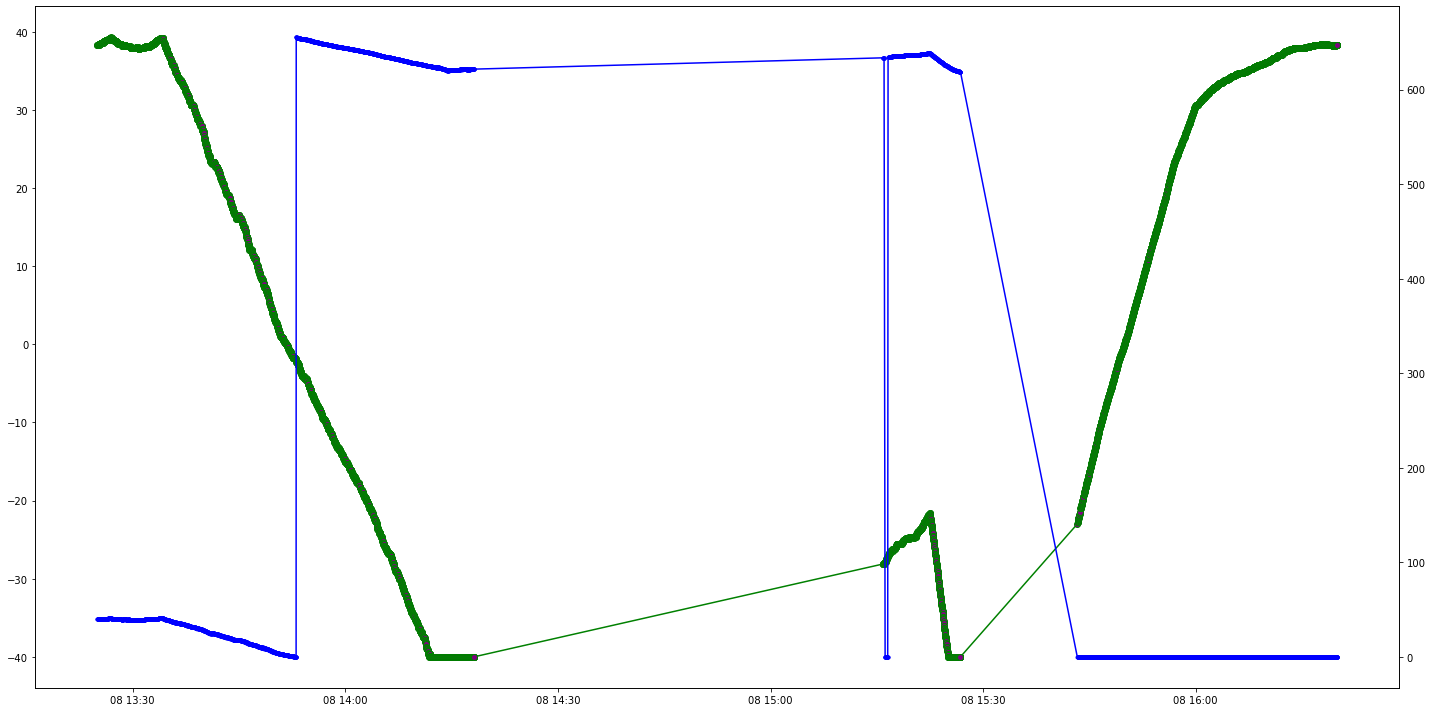

In [32]:
# create figure and axis objects with subplots()

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots()
# make a plot

ax.plot(df_new.index.to_pydatetime(), df_new['HDC TEMP, `C'], color="green",markerfacecolor = 'purple',marker="o")
ax2=ax.twinx()
ax2.plot(df_new.index.to_pydatetime(), df_new['LPS TEMP, `C'],color="blue",marker=".")
plt.show()



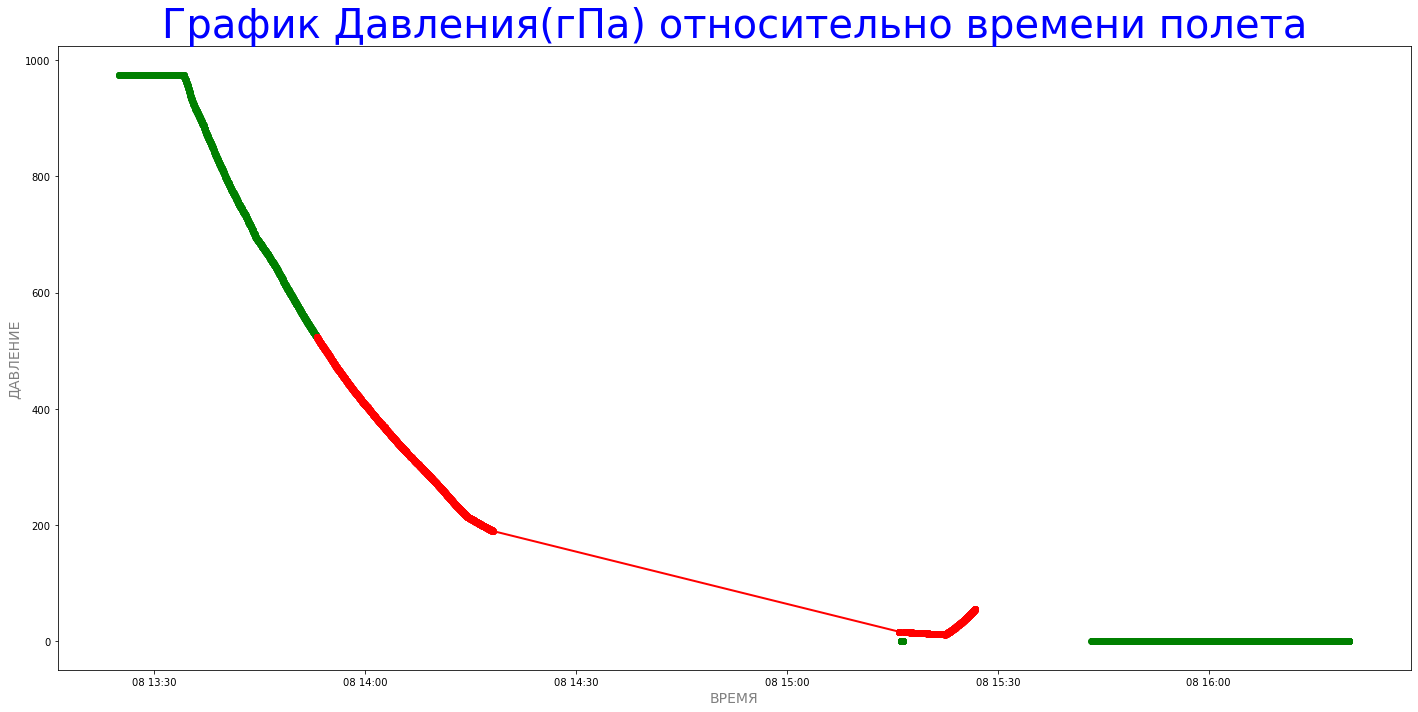

In [7]:

df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where((df['LPS TEMP, `C'] < -40) | (df['LPS TEMP, `C'] < 85), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ДАВЛЕНИЕ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['LPS PRESS, hPa'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График Давления(гПа) относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PressureRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

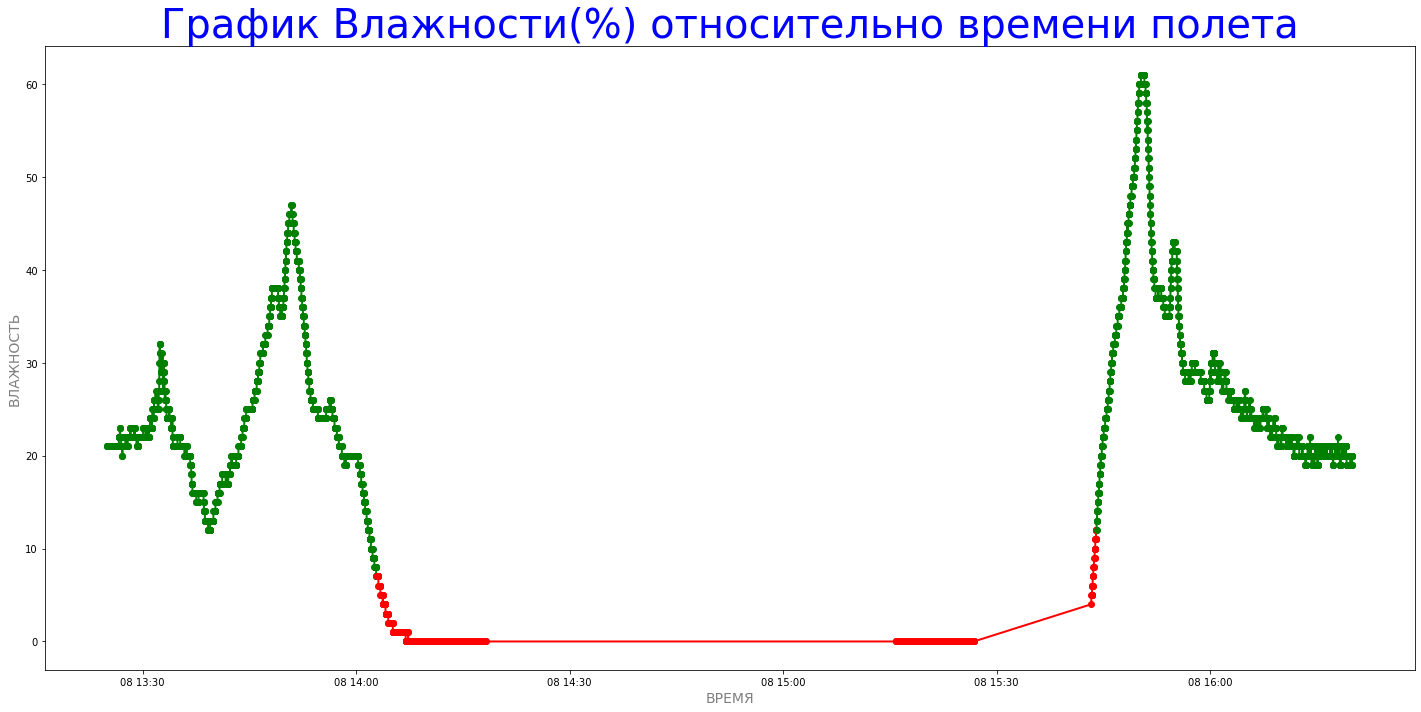

In [8]:

df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ВЛАЖНОСТЬ",color="gray",fontsize=14)
    ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
    ax.plot(group.index, group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="График Влажности(%) относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph HumidityRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

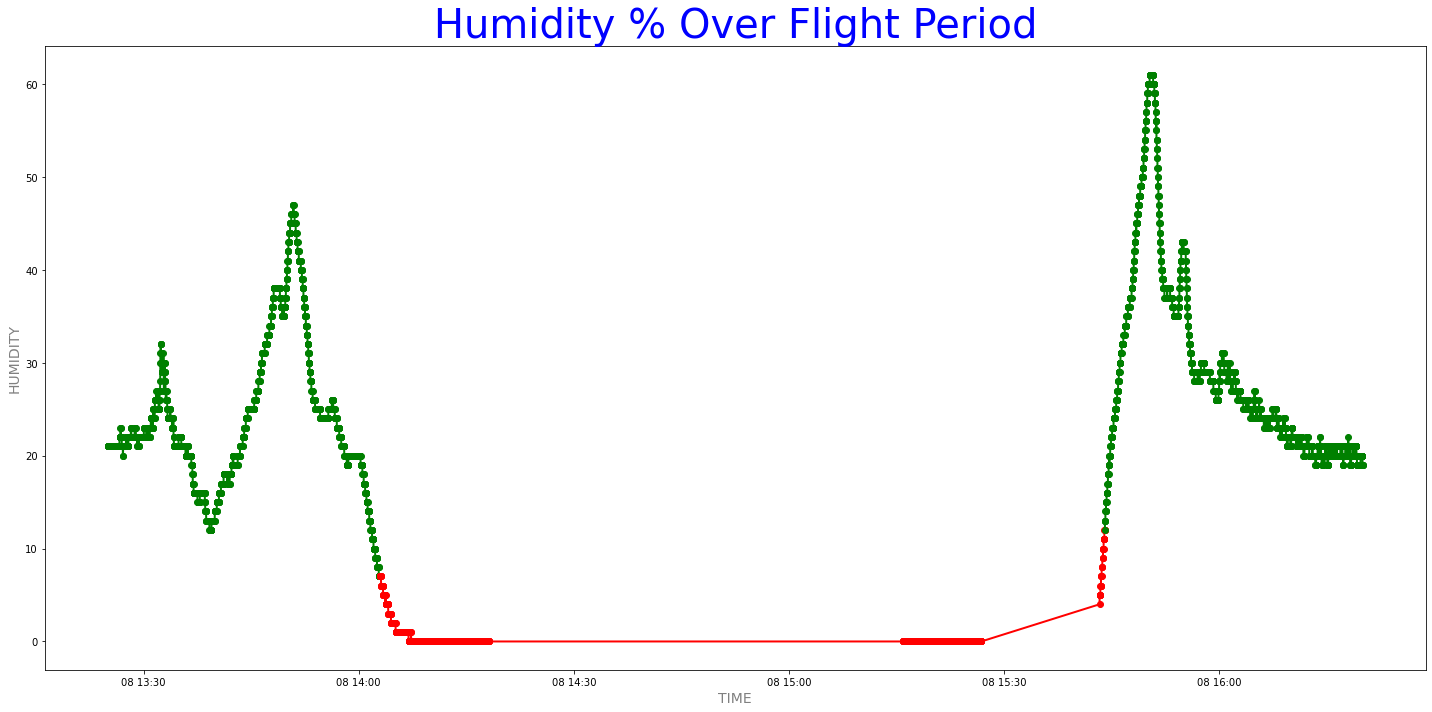

In [9]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("HUMIDITY",color="gray",fontsize=14)
    ax.set_xlabel("TIME",color="gray",fontsize=14)
    ax.plot(group.index, group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Humidity % Over Flight Period",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph HumidityRU.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

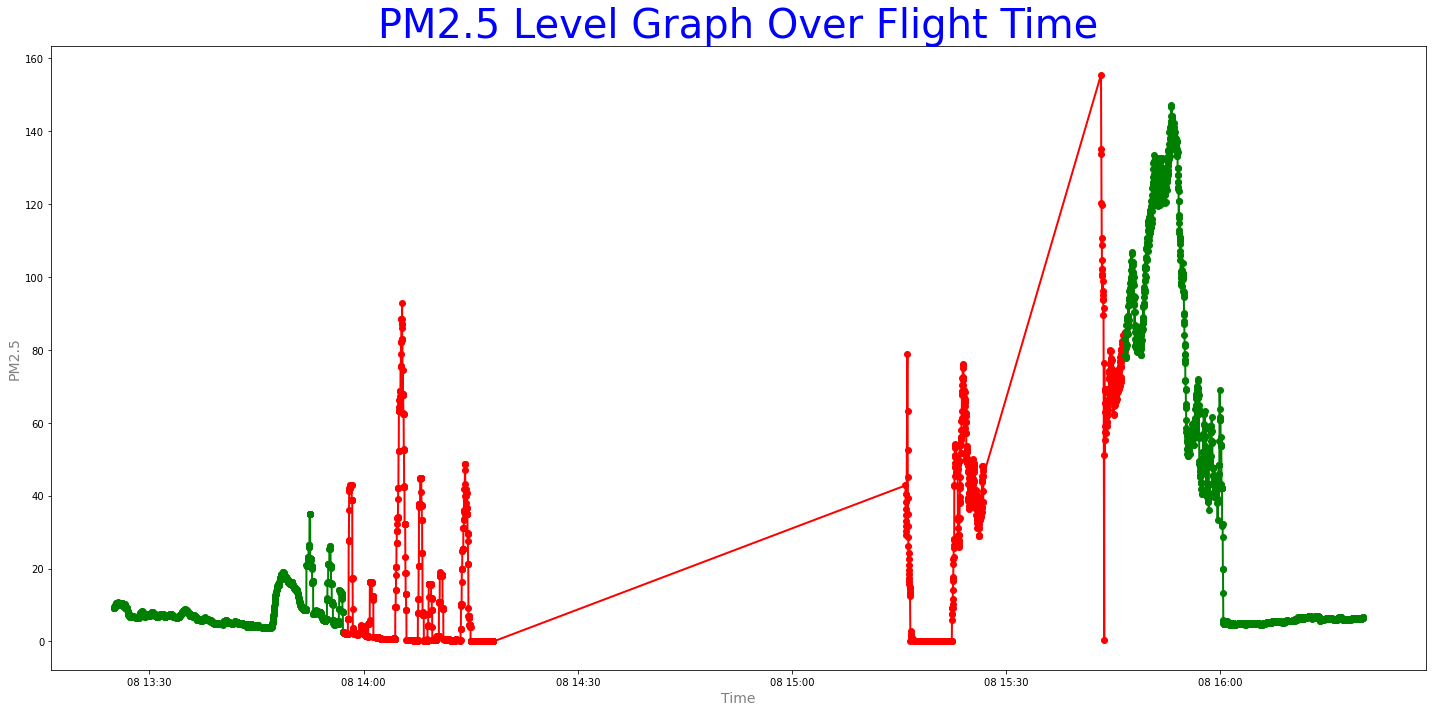

In [34]:

df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM2.5",color="gray",fontsize=14)
    ax.set_xlabel("Time",color="gray",fontsize=14)
    ax.plot(group.index, group['PM2.5'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM2.5 Level Graph Over Flight Time",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM2.5ENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

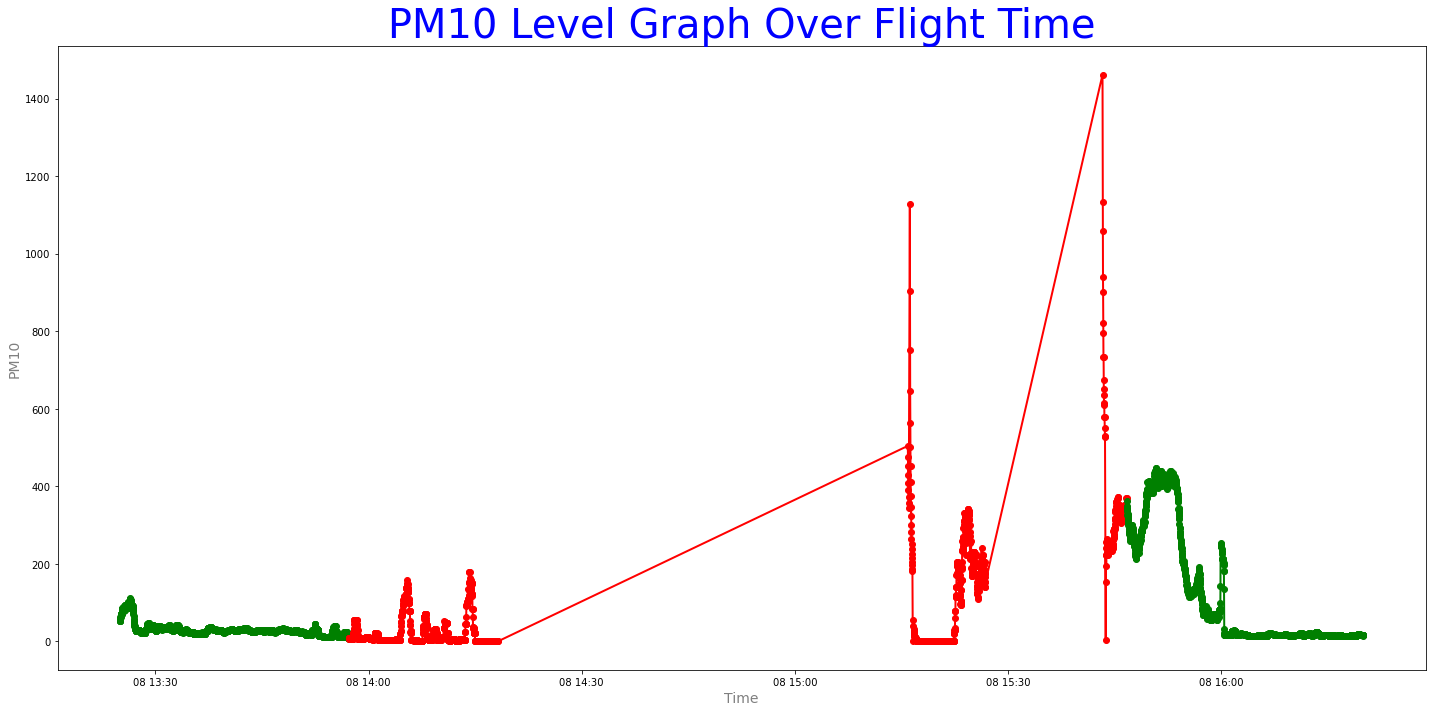

In [35]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM10",color="gray",fontsize=14)
    ax.set_xlabel("Time",color="gray",fontsize=14)
    ax.plot(group.index, group['PM10'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM10 Level Graph Over Flight Time",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM10ENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

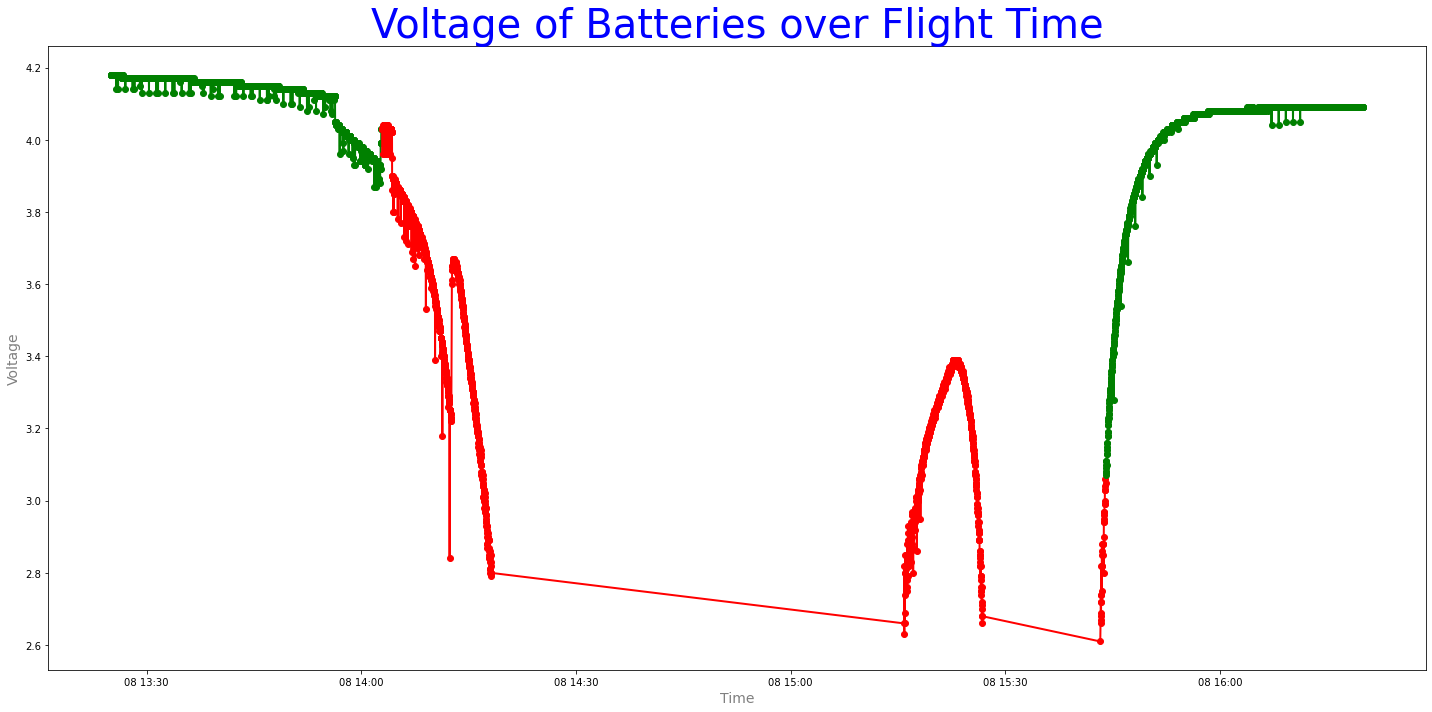

In [39]:

df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where((df['HDC TEMP, `C'] > -20) & (df['HDC TEMP, `C'] < 85), 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("Voltage",color="gray",fontsize=14)
    ax.set_xlabel("Time",color="gray",fontsize=14)
    ax.plot(group.index, group['BATT, V'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Voltage of Batteries over Flight Time",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph batterENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

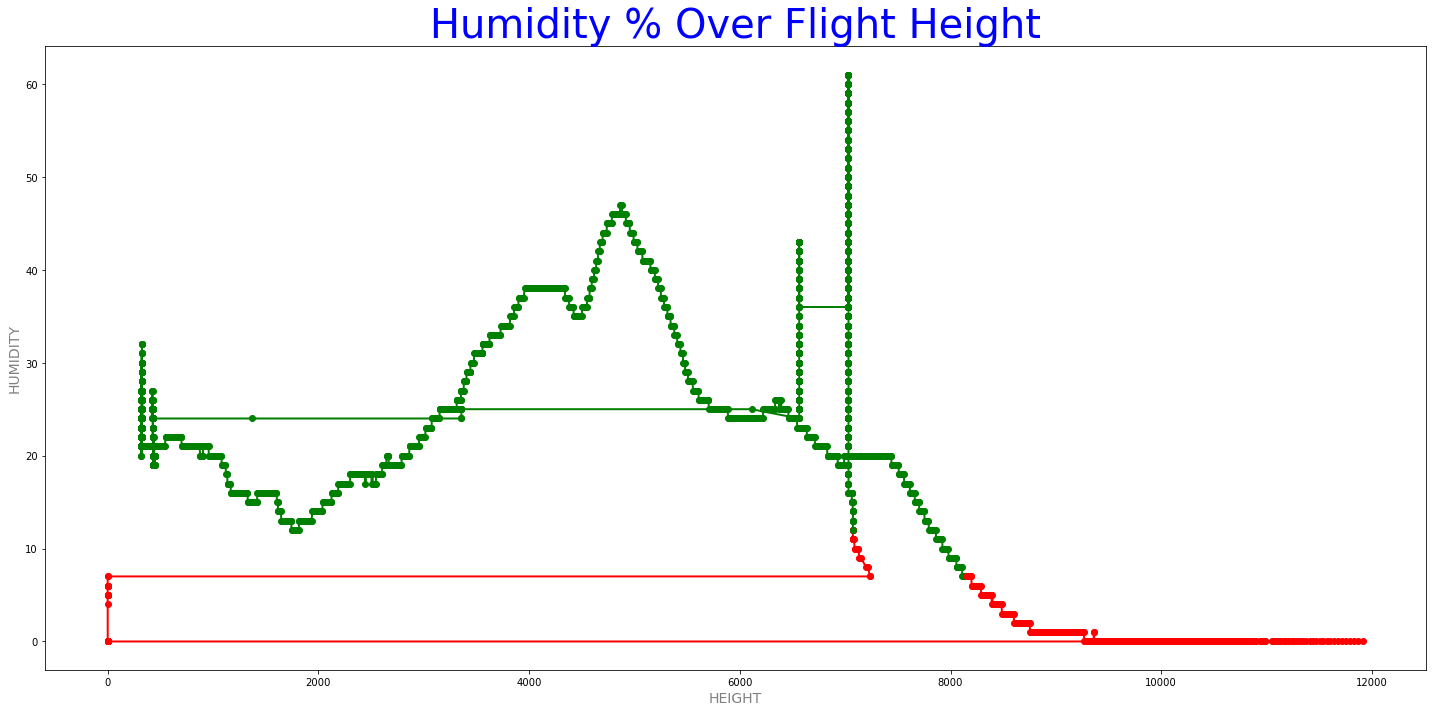

In [13]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("HUMIDITY",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Humidity % Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Humidity Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

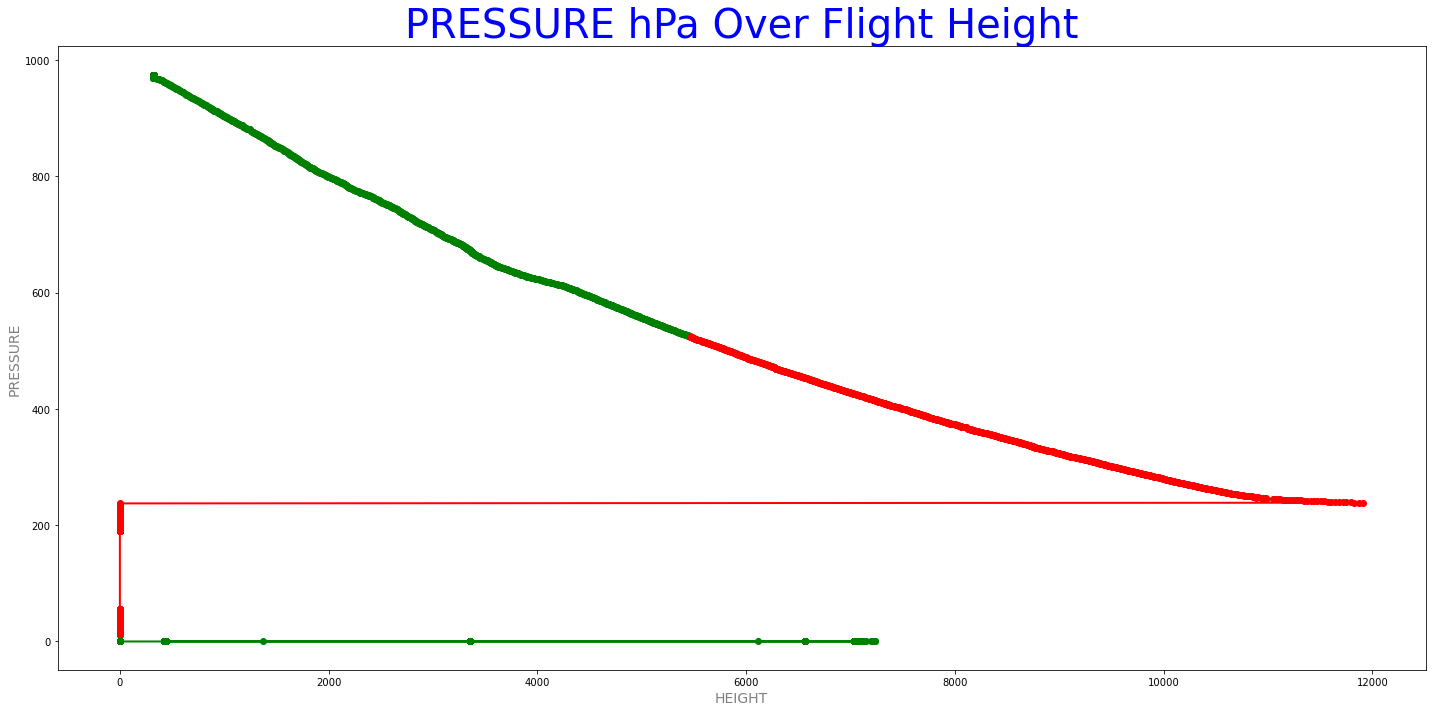

In [14]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where((df['LPS TEMP, `C'] > -40) & (df['LPS TEMP, `C'] < 85) , 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PRESSURE",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['LPS PRESS, hPa'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PRESSURE hPa Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph Pressure Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

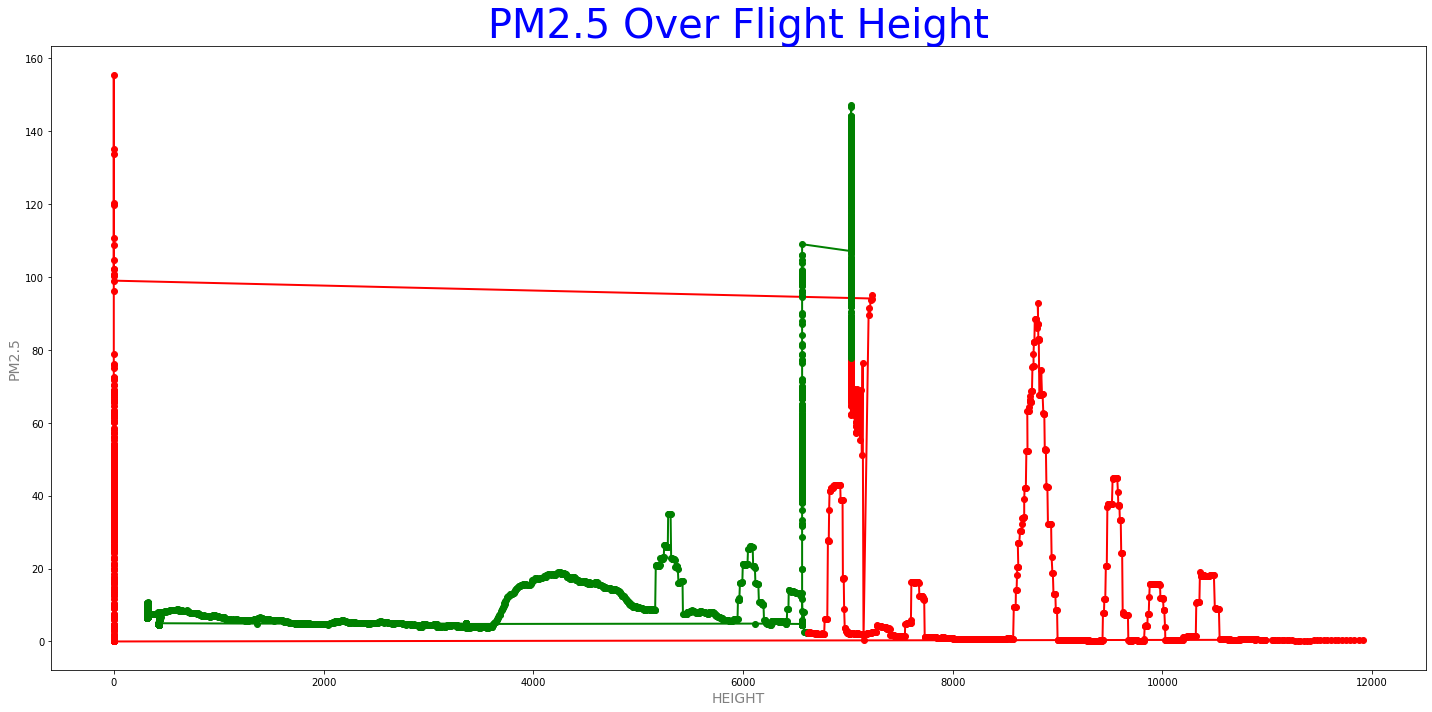

In [15]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM2.5",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['PM2.5'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM2.5 Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM2.5 Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

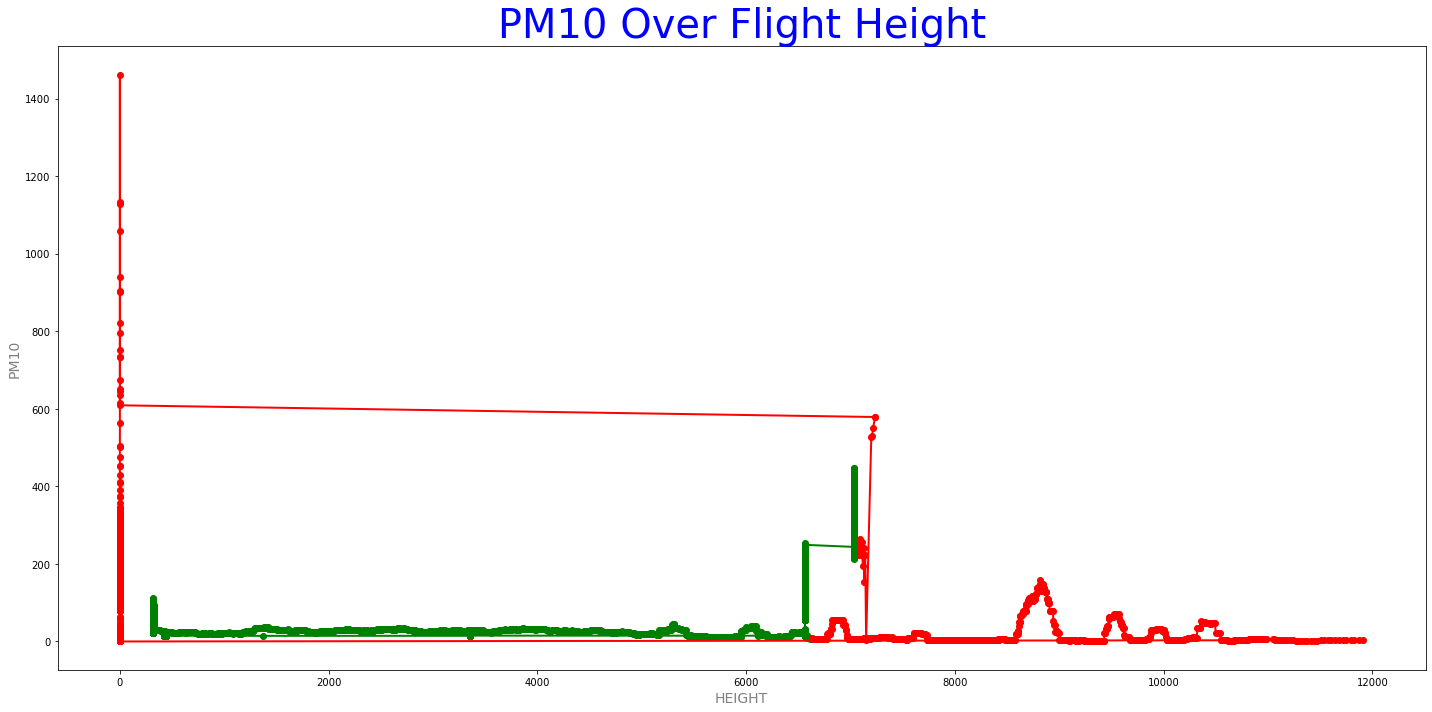

In [16]:
df=df_new.copy()
fig, ax = plt.subplots()
#пишем условие по которому цвет отличается
df['label'] = np.where(df['HDC TEMP, `C'] > -10, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("PM10",color="gray",fontsize=14)
    ax.set_xlabel("HEIGHT",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['PM10'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="PM10 Over Flight Height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph PM10 Height.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

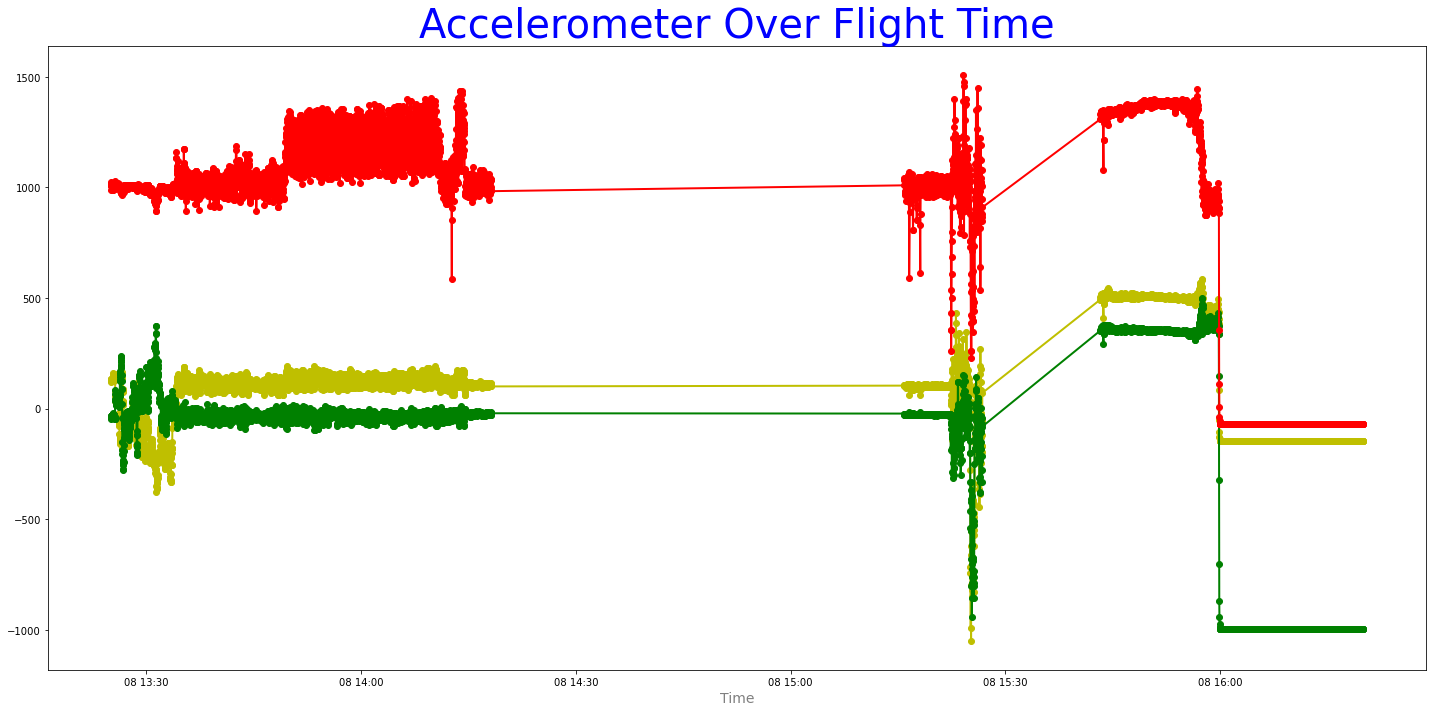

In [38]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_xlabel("Time",color="gray",fontsize=14)
ax.plot(df.index, df['LSM AX, mg'], c='y', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM AY, mg'], c='g', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM AZ, mg'], c='r', linewidth=lw,marker="o")
plt.title(label="Accelerometer Over Flight Time",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph LSMRUALLENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [18]:
df['LSM AX, mg'].to_csv('LSM')

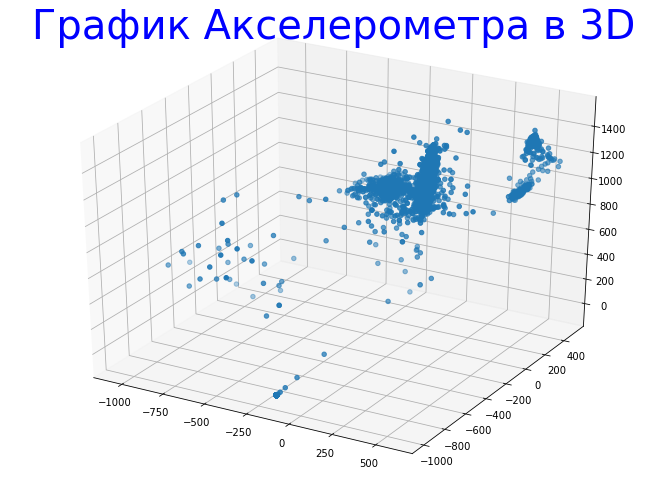

In [19]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
# Creating plot
ax.scatter3D(df['LSM AX, mg'], df['LSM AY, mg'], df['LSM AZ, mg'], cmap = my_cmap)
plt.title(label="График Акселерометра в 3D",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph ACC3D.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

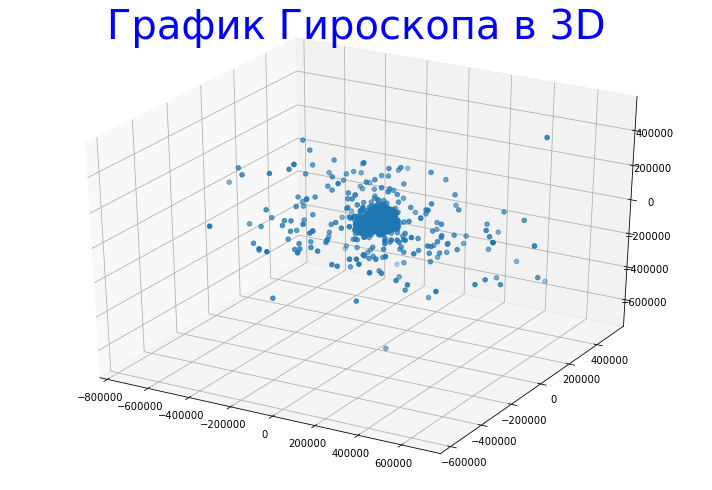

In [20]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
# Creating plot
ax.scatter3D(df['LSM GX'], df['LSM GY'], df['LSM GZ'], cmap = my_cmap)
plt.title(label="График Гироскопа в 3D",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph giro3D.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

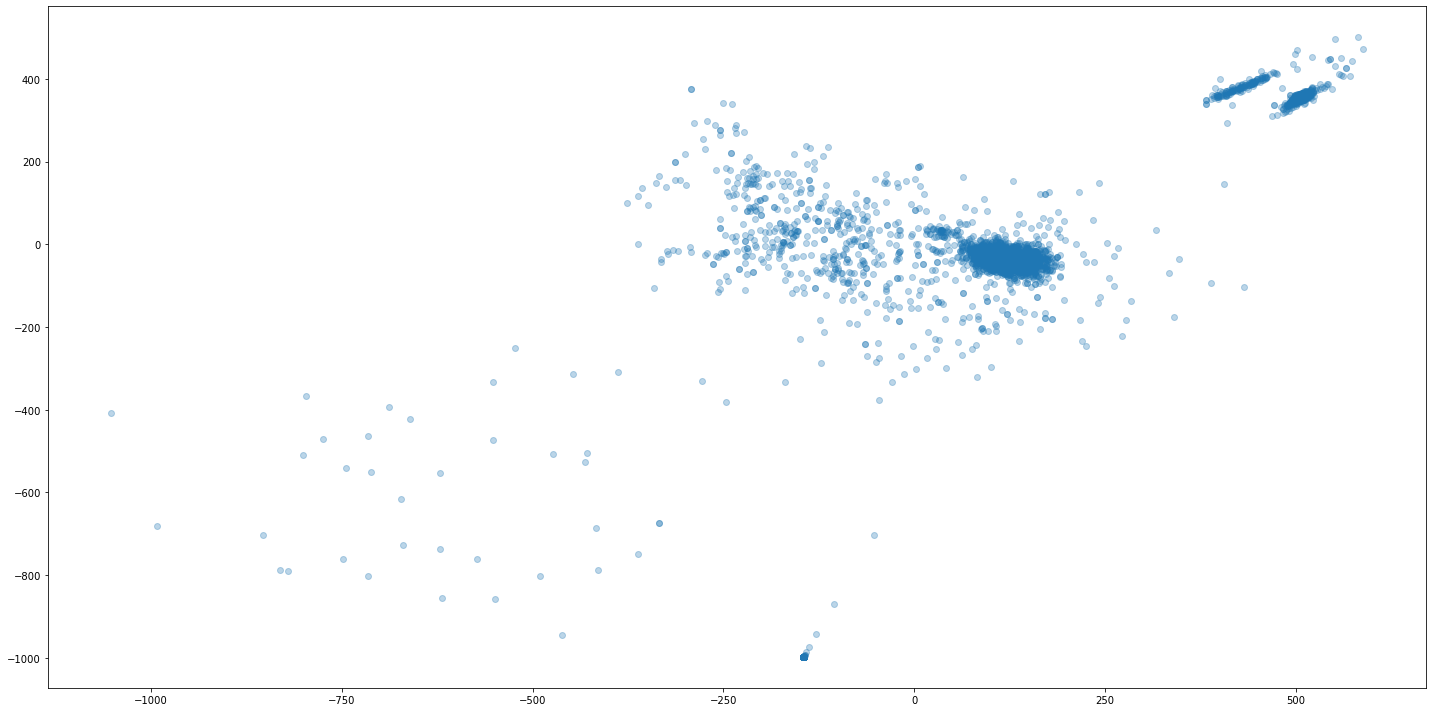

In [21]:
plt.scatter(df['LSM AX, mg'], df['LSM AY, mg'], alpha=0.3,cmap='viridis')

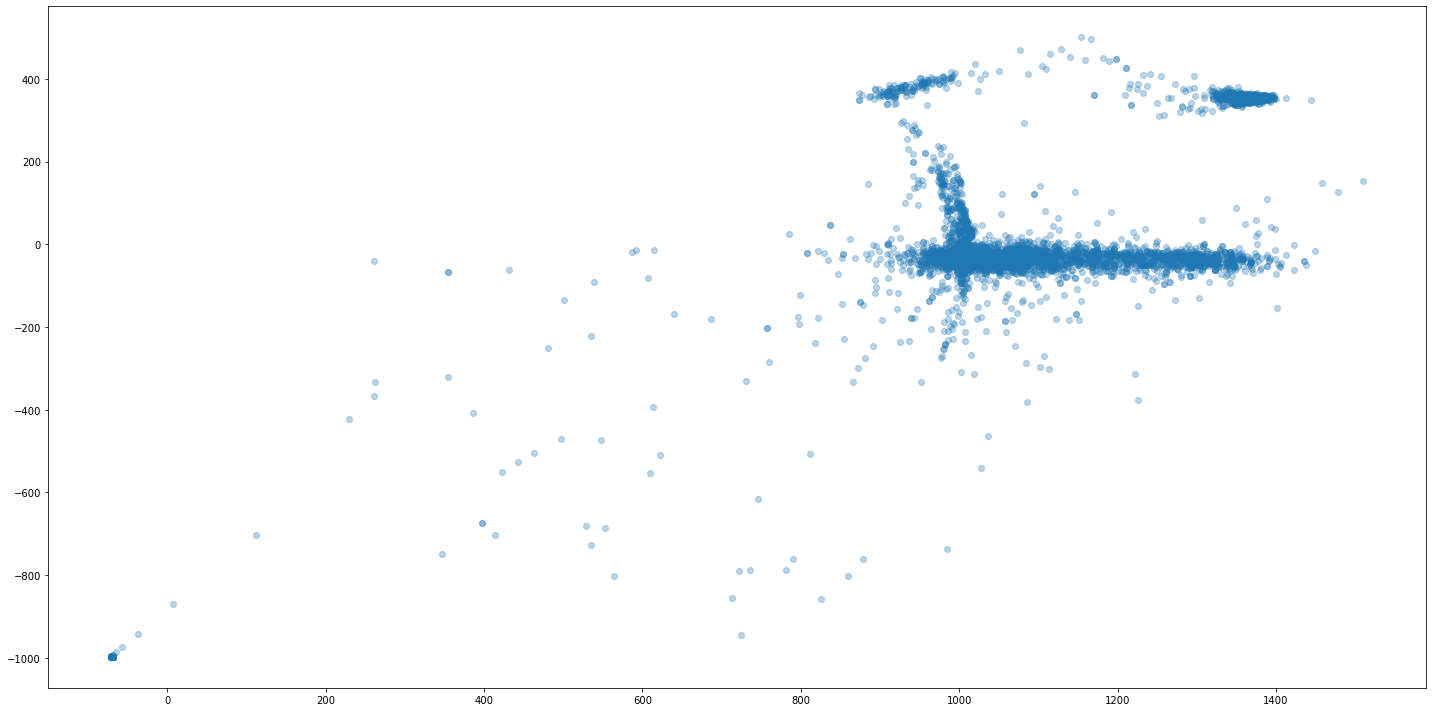

In [22]:
plt.scatter(df['LSM AZ, mg'], df['LSM AY, mg'], alpha=0.3,cmap='viridis')

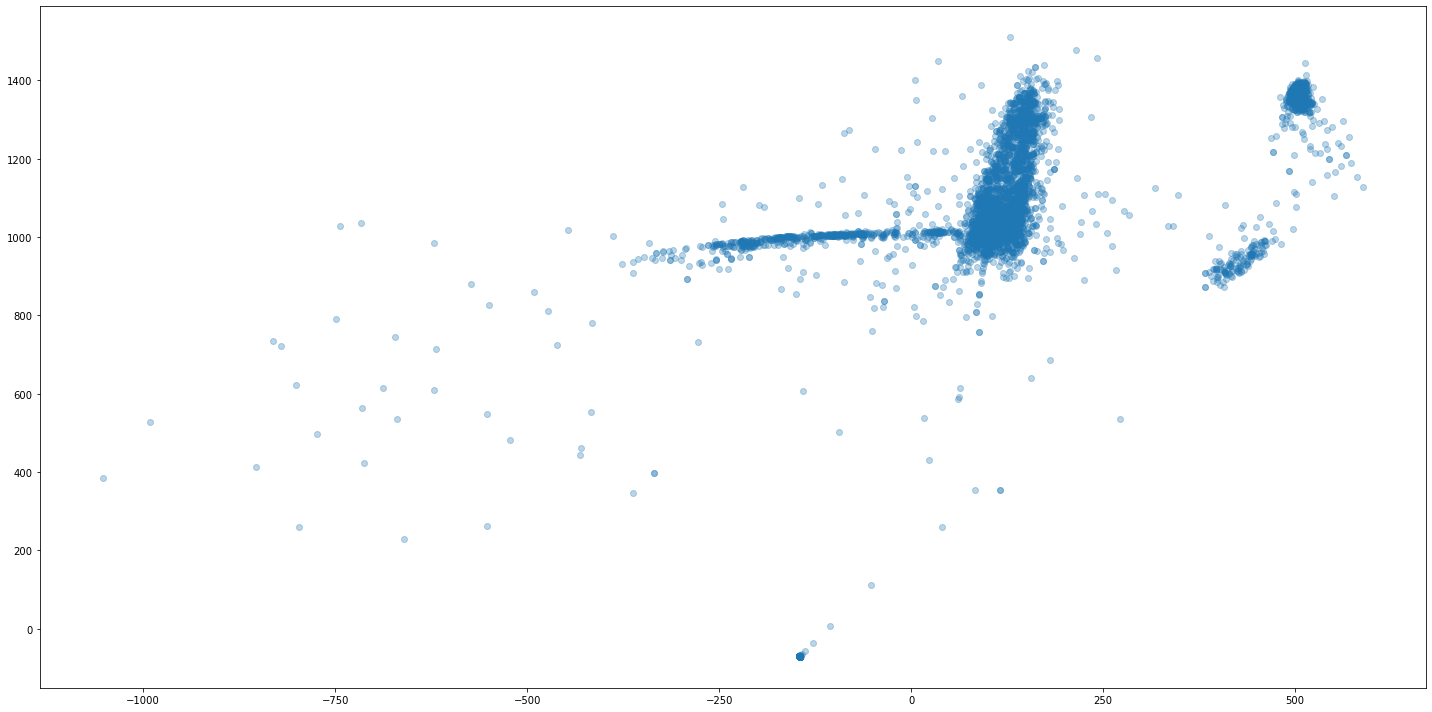

In [23]:
plt.scatter(df['LSM AX, mg'], df['LSM AZ, mg'], alpha=0.3,cmap='viridis')

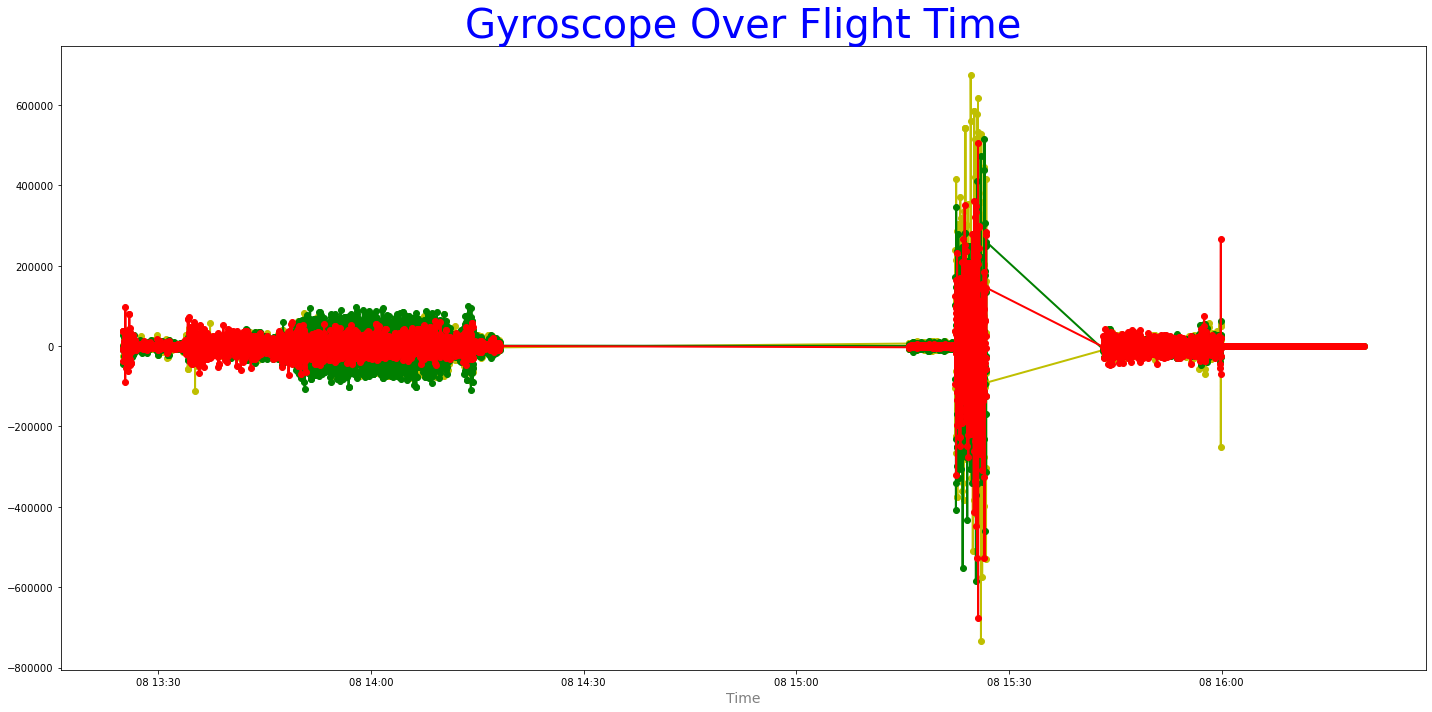

In [37]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_xlabel("Time",color="gray",fontsize=14)
ax.plot(df.index, df['LSM GX'], c='y', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM GY'], c='g', linewidth=lw,marker="o")
ax.plot(df.index, df['LSM GZ'], c='r', linewidth=lw,marker="o")
plt.title(label="Gyroscope Over Flight Time",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph LSMR9UALLENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

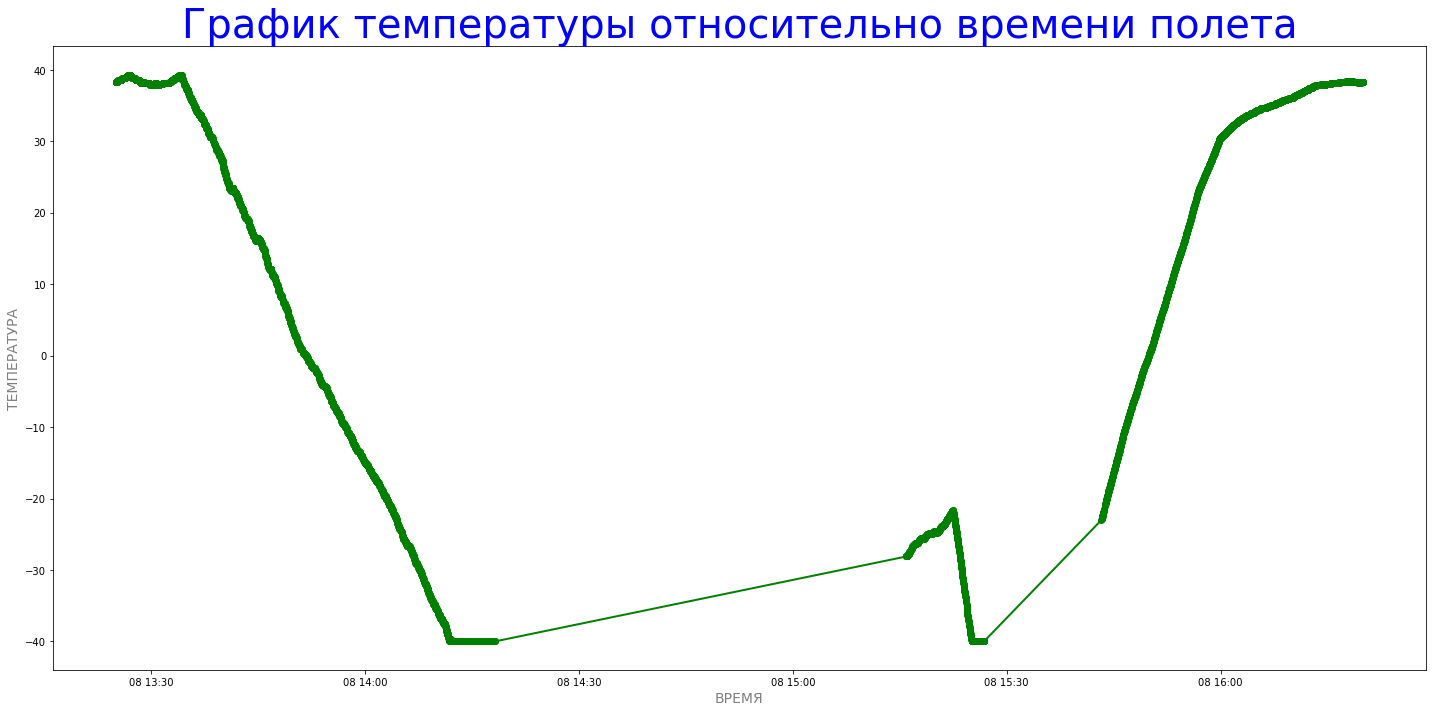

In [25]:
df=df_new.copy()
fig, ax = plt.subplots()
lw = 2.0
ax.set_ylabel("ТЕМПЕРАТУРА",color="gray",fontsize=14)
ax.set_xlabel("ВРЕМЯ",color="gray",fontsize=14)
ax.plot(df.index, df['HDC TEMP, `C'], c='g', linewidth=lw,marker="o")
#ax.plot(df.index, df['LPS TEMP, `C'], c='g', linewidth=lw,marker="o")
plt.title(label="График температуры относительно времени полета",fontsize=40,
          color="blue")
plt.show()

fig.savefig('Graph tempL.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

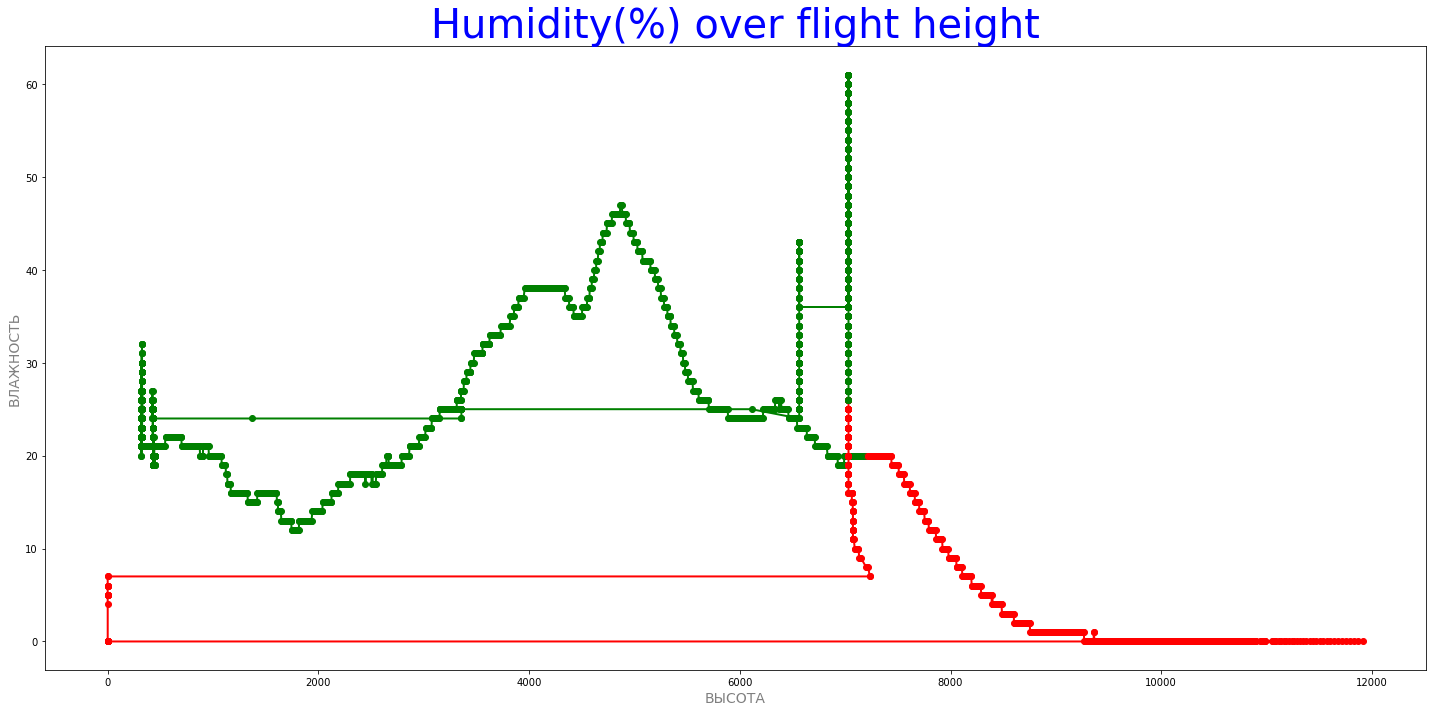

In [26]:
df=df_new.copy()
fig, ax = plt.subplots()
df['label'] = np.where(df['LSM TEMP, `C'] > -20, 1, -1)

def plot_func(group):
    global ax
    color = 'r' if (group['label'] < 0).all() else 'g'
    lw = 2.0
    ax.set_ylabel("ВЛАЖНОСТЬ",color="gray",fontsize=14)
    ax.set_xlabel("ВЫСОТА",color="gray",fontsize=14)
    ax.plot(group['Altitude, m'], group['HDC HUM, %'], c=color, linewidth=lw,marker="o")

df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

plt.title(label="Humidity(%) over flight height",fontsize=40,
          color="blue")
plt.show()

fig.savefig('NEWGraph Humidit HeightENG.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')